<a href="https://colab.research.google.com/github/kavy9/emotion-prediction-api/blob/main/HSB_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries 

In [ ]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tqdm.notebook import tqdm
import re

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Emotion_final.csv')

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [ ]:
df=df.dropna()

In [ ]:
voc_size=10000
#vocabalary_size

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


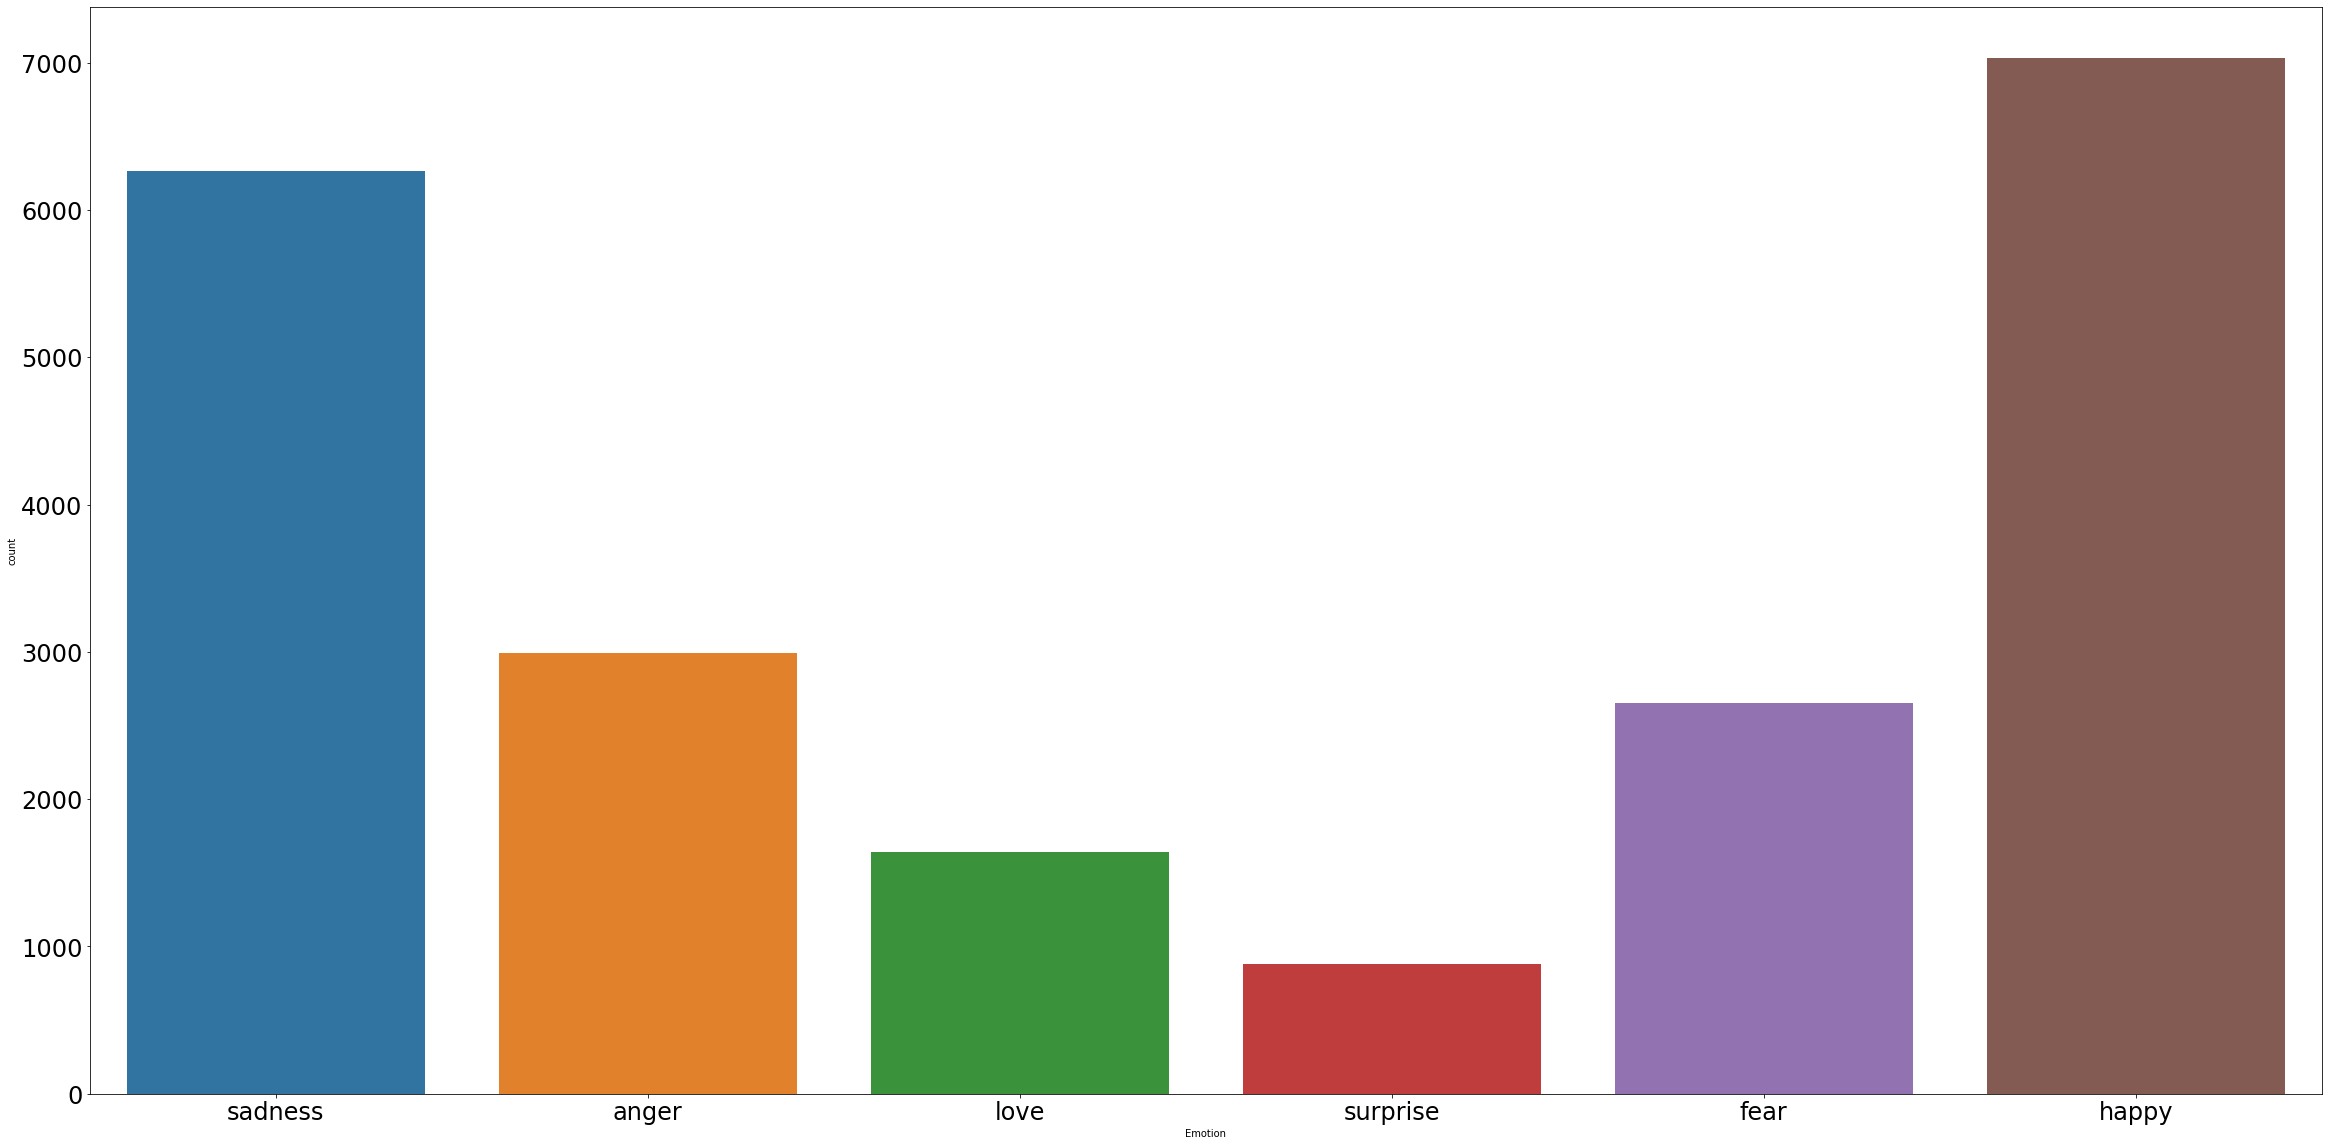

In [ ]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=df, x='Emotion')

<function matplotlib.pyplot.show>

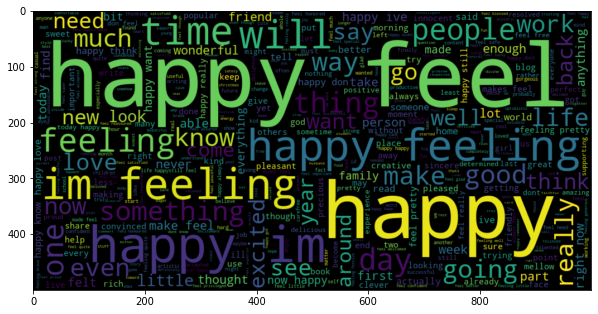

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=df[df. Emotion=='happy' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

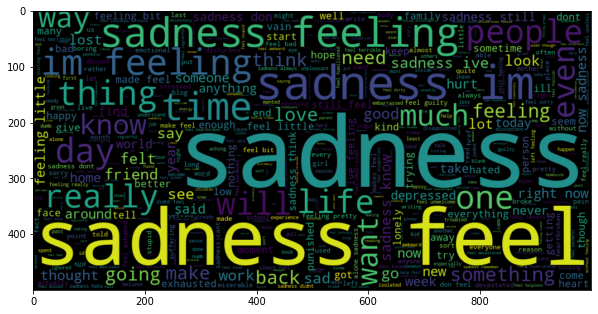

In [ ]:
#word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=df[df. Emotion=='sadness' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

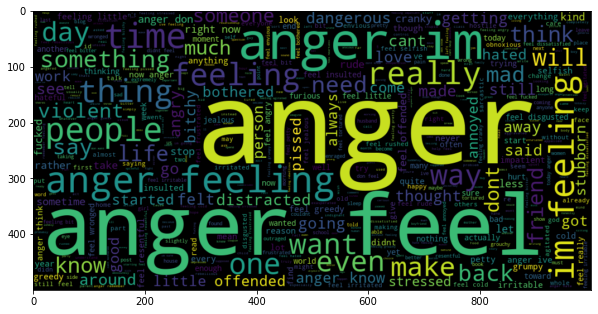

In [ ]:
#word cloud for anger review words
plt.figure(figsize=(10,10))
anger_text=df[df. Emotion=='anger' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
anger_words=WC.generate(anger_text)
plt.imshow(anger_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

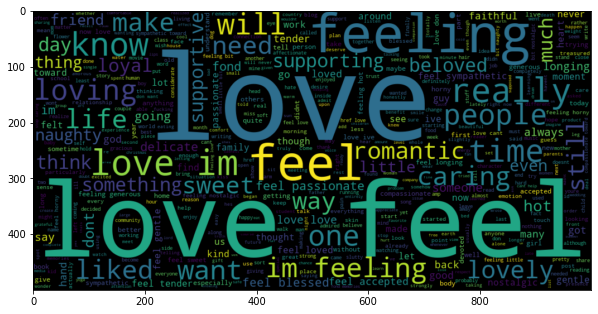

In [ ]:
#word cloud for love review words
plt.figure(figsize=(10,10))
love_text=df[df. Emotion=='love' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
love_words=WC.generate(love_text)
plt.imshow(love_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

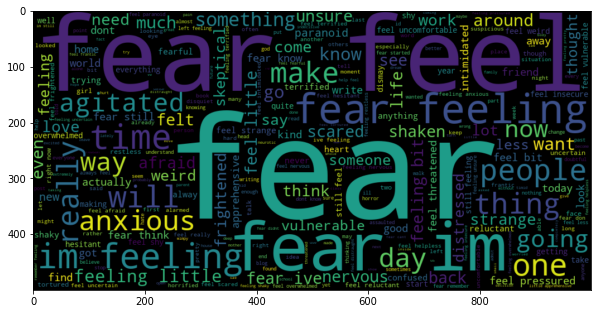

In [ ]:
#word cloud for fear review words
plt.figure(figsize=(10,10))
fear_text=df[df. Emotion=='fear'].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
fear_words=WC.generate(fear_text)
plt.imshow(fear_words,interpolation='bilinear')
plt.show

In [ ]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42,stratify=df.Emotion)

In [ ]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.Text):
        sentence=sentence.lower()
        
        # Remove |||
        sentence=sentence.replace('|||',"") 

        # Remove URLs, links etc
        sentence = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', sentence, flags=re.MULTILINE) 

        # Remove puntuations 
        puncs1=['@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/']
        for punc in puncs1:
            sentence=sentence.replace(punc,'') 

        puncs2=[',','.','?','!','\n']
        for punc in puncs2:
            sentence=sentence.replace(punc,' ')
             
        # Remove extra white spaces
        sentence=re.sub( '\s+', ' ', sentence ).strip()
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [ ]:
train_data.Text,train_length=clear_text(train_data)

  0%|          | 0/17167 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
test_data.Text,test_length=clear_text(test_data)

  0%|          | 0/4292 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.Text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.Lemmatizer object at 0x7fa9f8676050>,
                use_idf=True, vocabulary=None)

In [ ]:
train_post=vectorizer.transform(train_data.Text).toarray()
test_post=vectorizer.transform(test_data.Text).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.Emotion)
test_target=target_encoder.fit_transform(test_data.Emotion)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score



In [ ]:
models_accuracy={}

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.95      0.87      0.91      2394
        fear       0.92      0.86      0.89      2122
       happy       0.86      0.97      0.91      5623
        love       0.95      0.68      0.79      1313
     sadness       0.91      0.96      0.94      5012
    surprise       0.95      0.57      0.72       703

    accuracy                           0.90     17167
   macro avg       0.92      0.82      0.86     17167
weighted avg       0.91      0.90      0.90     17167



In [ ]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

test classification report 
               precision    recall  f1-score   support

       anger       0.89      0.75      0.81       599
        fear       0.86      0.77      0.81       530
       happy       0.82      0.95      0.88      1406
        love       0.89      0.60      0.72       328
     sadness       0.85      0.93      0.89      1253
    surprise       0.87      0.43      0.58       176

    accuracy                           0.85      4292
   macro avg       0.86      0.74      0.78      4292
weighted avg       0.85      0.85      0.84      4292



In [ ]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

test classification report 
               precision    recall  f1-score   support

       anger       0.89      0.75      0.81       599
        fear       0.86      0.77      0.81       530
       happy       0.82      0.95      0.88      1406
        love       0.89      0.60      0.72       328
     sadness       0.85      0.93      0.89      1253
    surprise       0.87      0.43      0.58       176

    accuracy                           0.85      4292
   macro avg       0.86      0.74      0.78      4292
weighted avg       0.85      0.85      0.84      4292



In [ ]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.99      0.14      0.25      2394
        fear       0.83      0.20      0.32      2122
       happy       0.35      1.00      0.52      5623
        love       1.00      0.05      0.10      1313
     sadness       1.00      0.00      0.01      5012
    surprise       0.95      0.23      0.38       703

    accuracy                           0.39     17167
   macro avg       0.85      0.27      0.26     17167
weighted avg       0.76      0.39      0.27     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.87      0.12      0.22       599
        fear       0.72      0.17      0.27       530
       happy       0.35      0.99      0.51      1406
        love       0.92      0.03      0.06       328
     sadness       1.00      0.00      0.00      1253
    surprise       0.67      0.20      0.31       176

    accuracy    

In [ ]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

In [ ]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       1.00      0.01      0.02      2394
        fear       0.94      0.02      0.04      2122
       happy       0.35      1.00      0.52      5623
        love       0.00      0.00      0.00      1313
     sadness       0.94      0.20      0.33      5012
    surprise       0.00      0.00      0.00       703

    accuracy                           0.39     17167
   macro avg       0.54      0.21      0.15     17167
weighted avg       0.64      0.39      0.28     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.50      0.01      0.01       599
        fear       1.00      0.01      0.02       530
       happy       0.35      1.00      0.51      1406
        love       0.00      0.00      0.00       328
     sadness       0.91      0.18      0.30      1253
    surprise       0.00      0.00      0.00       176

    accuracy    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models_accuracy['Random Forest']=accuracy_score(test_target,model_forest.predict(test_post))

In [ ]:
model_knn=KNeighborsRegressor(n_neighbors=1)
model_knn.fit(train_post,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
print('train classification report \n ',classification_report(train_target,model_knn.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_knn.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.99      1.00      0.99      2394
        fear       1.00      1.00      1.00      2122
       happy       1.00      1.00      1.00      5623
        love       0.99      0.99      0.99      1313
     sadness       1.00      1.00      1.00      5012
    surprise       0.99      0.99      0.99       703

    accuracy                           1.00     17167
   macro avg       0.99      1.00      0.99     17167
weighted avg       1.00      1.00      1.00     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.43      0.43      0.43       599
        fear       0.46      0.36      0.40       530
       happy       0.57      0.56      0.56      1406
        love       0.75      0.31      0.44       328
     sadness       0.56      0.56      0.56      1253
    surprise       0.14      0.41      0.21       176

    accuracy    

In [ ]:
models_accuracy['KNN']=accuracy_score(test_target,model_knn.predict(test_post))

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.96      0.76      0.85      2394
        fear       0.93      0.71      0.81      2122
       happy       0.77      0.98      0.86      5623
        love       1.00      0.32      0.49      1313
     sadness       0.81      0.97      0.88      5012
    surprise       1.00      0.15      0.26       703

    accuracy                           0.83     17167
   macro avg       0.91      0.65      0.69     17167
weighted avg       0.86      0.83      0.81     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.90      0.59      0.72       599
        fear       0.86      0.51      0.64       530
       happy       0.71      0.96      0.81      1406
        love       0.97      0.23      0.37       328
     sadness       0.73      0.93      0.82      1253
    surprise       1.00      0.09      0.17       176

    accuracy    

In [ ]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

In [ ]:
!pip install catboost

In [ ]:
from sklearn.svm import SVC,LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [ ]:
model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',verbose=False)
model_cat.fit(train_post,train_target)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.95      0.90      0.92      2394
        fear       0.90      0.89      0.90      2122
       happy       0.89      0.95      0.92      5623
        love       0.89      0.79      0.84      1313
     sadness       0.95      0.94      0.94      5012
    surprise       0.88      0.79      0.83       703

    accuracy                           0.92     17167
   macro avg       0.91      0.88      0.89     17167
weighted avg       0.92      0.92      0.91     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.90      0.83      0.87       599
        fear       0.86      0.86      0.86       530
       happy       0.88      0.93      0.90      1406
        love       0.84      0.80      0.82       328
     sadness       0.93      0.92      0.92      1253
    surprise       0.78      0.72      0.75       176

    accuracy    

In [ ]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">XGBoost Classifier</h4>

In [ ]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1,task_type='GPU')
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, task_type='GPU', tree_method='gpu_hist',
              verbosity=1)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.96      0.62      0.75      2394
        fear       0.95      0.61      0.74      2122
       happy       0.61      0.98      0.75      5623
        love       0.93      0.63      0.75      1313
     sadness       0.96      0.73      0.83      5012
    surprise       0.89      0.69      0.78       703

    accuracy                           0.77     17167
   macro avg       0.88      0.71      0.77     17167
weighted avg       0.84      0.77      0.77     17167

test classification report 
                precision    recall  f1-score   support

       anger       0.90      0.55      0.68       599
        fear       0.92      0.55      0.69       530
       happy       0.58      0.97      0.72      1406
        love       0.89      0.61      0.72       328
     sadness       0.92      0.66      0.77      1253
    surprise       0.76      0.59      0.67       176

    accuracy    

In [ ]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">SVC</h4>

In [ ]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.99      0.98      0.99      2394
        fear       0.98      0.99      0.98      2122
       happy       0.98      0.99      0.99      5623
        love       0.99      0.95      0.97      1313
     sadness       0.99      0.99      0.99      5012
    surprise       0.99      0.95      0.97       703

    accuracy                           0.99     17167
   macro avg       0.99      0.98      0.98     17167
weighted avg       0.99      0.99      0.99     17167



In [ ]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">Linear SVC</h4>

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(6)])))

train classification report 
                precision    recall  f1-score   support

       anger       0.95      0.91      0.93      2394
        fear       0.93      0.90      0.91      2122
       happy       0.91      0.97      0.94      5623
        love       0.94      0.80      0.87      1313
     sadness       0.94      0.96      0.95      5012
    surprise       0.95      0.79      0.86       703

    accuracy                           0.93     17167
   macro avg       0.94      0.89      0.91     17167
weighted avg       0.93      0.93      0.93     17167

test classification report 
               precision    recall  f1-score   support

       anger       0.89      0.80      0.84       599
        fear       0.86      0.80      0.83       530
       happy       0.86      0.95      0.90      1406
        love       0.87      0.73      0.79       328
     sadness       0.88      0.92      0.90      1253
    surprise       0.84      0.64      0.73       176

    accuracy     

In [ ]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

### Comparing Models

In [ ]:
models_accuracy

{'CatBoost Classifier': 0.8869990680335508,
 'Decision Tree classifier': 0.37371854613233924,
 'KNN': 0.4906803355079217,
 'Linear Support Vector classifier': 0.8716216216216216,
 'Multinomial Naive Bayes': 0.7516309412861137,
 'Random Forest': 0.3800093196644921,
 'Support Vector classifier': 0.8634669151910531,
 'XGBoost Classifier': 0.7246039142590867}

In [ ]:
models_accuracy.keys()

dict_keys(['Decision Tree classifier', 'Random Forest', 'KNN', 'Multinomial Naive Bayes', 'CatBoost Classifier', 'XGBoost Classifier', 'Support Vector classifier', 'Linear Support Vector classifier'])

In [ ]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [ ]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
X=df[:]['Text']
y=df[:]['Emotion']

In [ ]:
messages=X.reset_index()

### Tokenizing words

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
def Stemm(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
from tqdm import tqdm
tqdm.pandas()


In [ ]:
df['Text']=df['Text'].progress_apply(Stemm)
df

kaggle

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:10]

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
#Finding max words
l = 0
for x in corpus:
    l = max(l,len(x.split(' ')))
print(l)

In [ ]:
sent_length=35
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [ ]:
embedded_docs[0]

In [ ]:
embedded_docs[0].shape

In [ ]:
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
model.summary()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X_final=np.array(embedded_docs)
y = label_encoder.fit_transform(y)
y_final=np.array(y)
print(y_final)

In [ ]:
X_final.shape,y_final.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=21)

In [ ]:
model_save = ModelCheckpoint('weights.h5', save_best_only = True, save_weights_only = True, monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=256,callbacks = [model_save])

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('weights.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print(y_pred)

In [ ]:
y_pred[0]

In [ ]:
y_test.shape

In [ ]:
y_pred[0]

In [ ]:
np.where(y_pred[0]==np.amax(y_pred[0]))[0][0]

In [ ]:
for item in y_pred:
  print(type(item))
  break

In [ ]:
from tqdm import tqdm

In [ ]:
dicto={
    0:'sadness',
    1:'anger',
    2:'love',
    3:'surprise',
    4:'fear',
    5:'happy'
}
def list_to_emotion(list_):
  listo=[]
  for item in tqdm(list_):
    listo.append(np.where(item==np.amax(item))[0][0])
  return listo

In [ ]:
test_fn_y=list_to_emotion(y_pred)

In [ ]:
test_fn_y=np.array(test_fn_y)

In [ ]:
test_fn_y[:5]

In [ ]:
y_test[:6]

In [ ]:
print(accuracy_score(y_test,test_fn_y))

In [ ]:
y_pred=test_fn_y

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

In [ ]:
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d"))

In [ ]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

In [ ]:
def predict_emotion(stri):
    review = re.sub('[^a-zA-Z]', ' ', stri)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    onehot_repr = [one_hot(review,voc_size)] 
    embed = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    predicti = model.predict(embed)
    return label_encoder.classes_[np.argmax(predicti)]

In [ ]:
import pickle

pickle.dump(model, open('model_text_analysis.sav', 'wb'))

In [ ]:
model.save('/content/drive/MyDrive/model_text_analysis')

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'model_text_analysis.sav')

In [ ]:
predict_emotion('He is an arrogant and rude person')

In [ ]:
predict_emotion('bisht why you are like this')